### Requirements:
- Python3
- Scipy, numpy, matplotlib, skmonaco
(pip3 install --upgrade numpy scipy matplotlib scikit-monaco)




# Import modules and Functions

## Modules

In [1]:
%matplotlib inline

import sys
sys.path.append('Python/')
from main import *

/Users/benjaminaubin/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# Main - AMP and State Evolution

## Parameters

- PW_choice = {binary,gaussian} : weights distribution
- alpha $\in [0.0-5.0]$ : $\alpha=\frac{m}{n}$
- verbose = {True,False} : to print intermediate results

In [2]:
K = 2 
N = 10000 # N=1000 for test otherwise N=10000

PW_choice = 'binary' #PW_choice= binary or gaussian
alpha = 1.8
verbose = False

## State Evolution

#### 1. Run SE (Initilization loading backup to speed up the computation) 

In [3]:
obj_SE= run_SE(K=K,PW_choice=PW_choice,alpha=alpha,verbose=verbose)

Start initialization
Succeeded to load old objects :  Nearest alpha= 1.8
Successful initialization 

K= 2 PW= binary alpha= 1.8 channel= sign-sign
Start SE: Mon Jun 11 12:09:56 2018
Final overlap q_SE=
[0.45836988 0.24338854]
[0.24338854 0.45836988]
End SE


## Approximate Message Passing

#### Run AMP: training on M=alpha.N samples

In [4]:
obj_AMP = run_AMP(K=K,PW_choice=PW_choice,N=N,alpha=alpha,verbose=verbose)

Start initialization
Successful initialization 

K= 2 PW= binary alpha= 1.8
Start AMP: Mon Jun 11 12:11:17 2018
Final overlap: q_AMP=
[0.47130079 0.22744415]
[0.22744415 0.47288833]
End AMP


#### 2. Plot the evolution of $q_{AMP}^t$

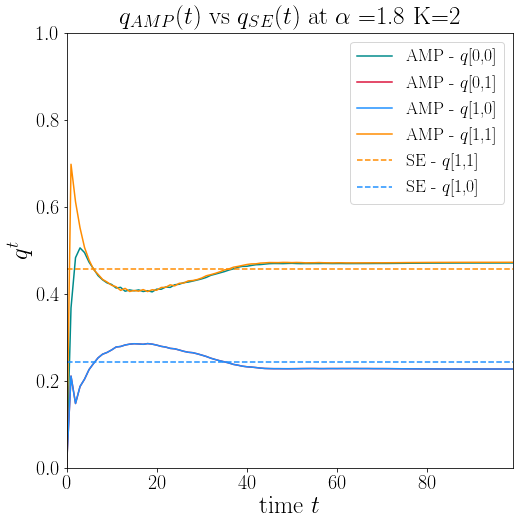

In [5]:
plot_q(obj_AMP,obj_SE)

We show the overlap matrix elements $q^t$ as a function of time $t$, for the committee machine with two hidden unites ($K=2$) at $\alpha =1.8$.

The full lines show the overlap matrix elements of the AMP algorithm for a single sample. The dashed lines show the assymptotic behaviour of the algorithm in the limit N $\to \infty$ and averaging over many samples. 

As illustrated, the overlap matrix of the AMP algorithm converges towards its state evolution overlap. 

## Generalization error

We then compute the generalization error of the state evolution prediction and compare it to the algothimic error averaged over N_samples_gen_error$=10000$ samples

#### 1. Compute SE generalization error

In [6]:
gen_error_SE = run_gen_error_SE(obj_SE)

alpha= 1.8 gen_err= 0.13544699999999998


#### 2. AMP generalization error (over N_samples_gen_error new samples)

In [7]:
## Compute the corresponding Generalization Error
N_samples_gen_error = 10000
tab_gen_AMP = run_gen_error_AMP(obj_AMP,K,PW_choice,N,alpha,N_samples_gen_error)

Start Gen Error
0.0 %
10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %
End Gen Error
Generalization Error = 0.13385693308695626


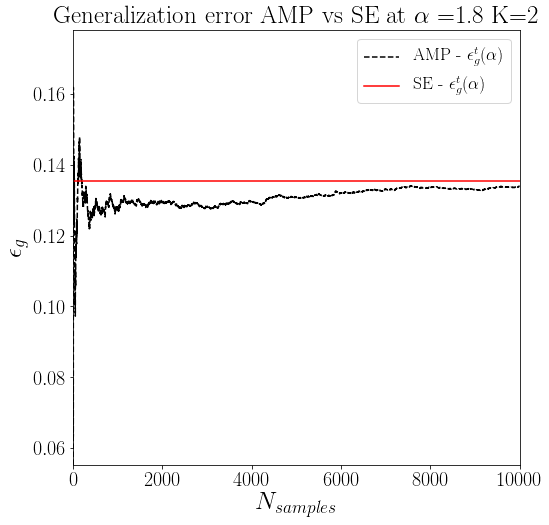

In [8]:
plot_gen_error(obj_AMP,tab_gen_AMP,gen_error_SE)